# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format ='retina'
%matplotlib inline

In [2]:
# load data
data = pd.read_csv('PS_20174392719_1491204439457_log.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Features meaning:

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [3]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [4]:
# dataset column names
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
# dataset shape
data.shape

(6362620, 11)

In [6]:
# dataset summary
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


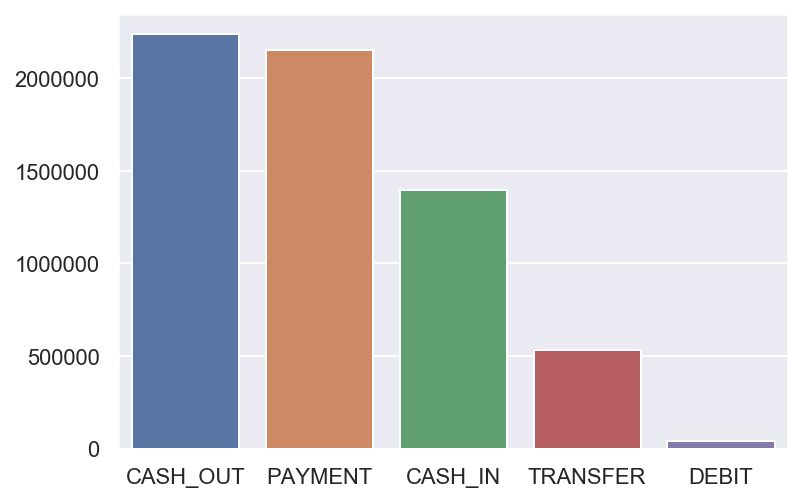

In [8]:
# counts by type of operation
sns.set()
ax = sns.barplot(x=data['type'].value_counts().index, y=data['type'].value_counts().values)
plt.show()

In [40]:
# fraud by type
#fraud_type = data[['type','amount','isFraud','isFlaggedFraud']]
fraud_type = data[data.isFraud == 1]
fraud_type.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


In [41]:
fraud_type.type.unique()

array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [42]:
fraud_type.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,8213.000000,8.213000e+03,8.213000e+03,8.213000e+03,8.213000e+03,8.213000e+03,8213.0,8213.000000
mean,368.413856,1.467967e+06,1.649668e+06,1.923926e+05,5.442496e+05,1.279708e+06,1.0,0.001948
std,216.388690,2.404253e+06,3.547719e+06,1.965666e+06,3.336421e+06,3.908817e+06,0.0,0.044097
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000
25%,181.000000,1.270913e+05,1.258224e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.0,0.000000
50%,367.000000,4.414234e+05,4.389835e+05,0.000000e+00,0.000000e+00,4.676420e+03,1.0,0.000000
75%,558.000000,1.517771e+06,1.517771e+06,0.000000e+00,1.478287e+05,1.058725e+06,1.0,0.000000
max,743.000000,1.000000e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.0,1.000000


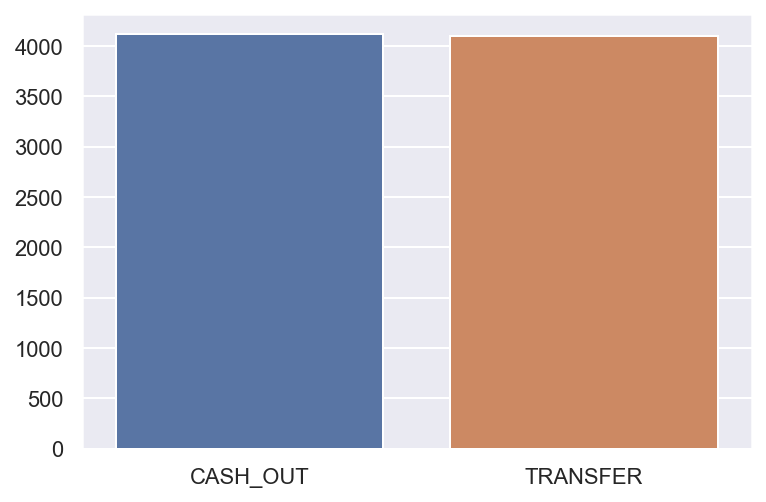

In [43]:
sns.barplot(x= fraud_type.type.value_counts().index, y= fraud_type.type.value_counts().values, data=fraud_type)
plt.show()

In [44]:
# the flagged fraud were really fraud?
data[data['isFlaggedFraud'] == 1].isFraud.unique()

array([1], dtype=int64)

In [15]:
'''
all fraud flagged instances were really fraud
'''

'\nall fraud flagged instances were really fraud\n'

In [20]:
# were all the frauds flagged as fraud?
data[data['isFraud'] == 1].isFlaggedFraud.unique()

array([0, 1], dtype=int64)

In [25]:
fraud_not_flag = data.loc[(data.isFraud == 1) & (data.isFlaggedFraud == 0)]
fraud_not_flag.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


In [30]:
fraud_not_flag.shape

(8197, 11)

In [31]:
'''
not all fraud instances were flagged fraud.
'''

'\nnot all fraud instances were flagged fraud.\n'

In [45]:
len(fraud_type.nameOrig.unique())

8213

In [46]:
len(fraud_type.nameDest.unique())

8169

In [58]:
print('in my opinion, the important features in determining the outcome are the type and the amount.the other features have too many unique values to produce meaningful insights.')

in my opinion, the important features in determining the outcome are the type and the amount.the other features have too many unique values to produce meaningful insights.


### What is the distribution of the outcome? 

In [48]:
# check outcome's value counts
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [49]:
# check outcome's proportion
data['isFraud'].value_counts() / len(data['isFraud'])

0    0.998709
1    0.001291
Name: isFraud, dtype: float64

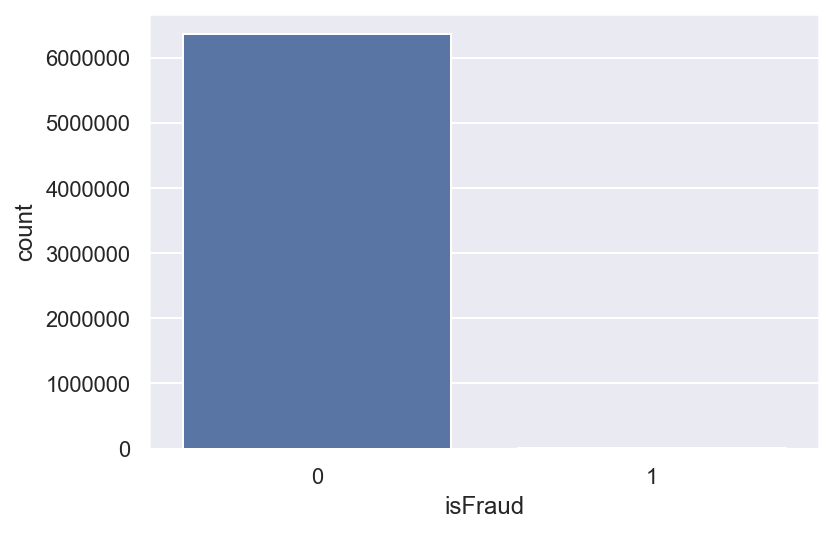

In [50]:
# plot distribution of the outcome
sns.countplot(data['isFraud'])
plt.show()

In [53]:
'''
the dataset is strongly imbalanced
'''

'\nthe dataset is strongly imbalanced\n'

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [52]:
# check for duplicates
data.duplicated().sum()

0

In [54]:
# check for missing values
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [125]:
# drop unmeaningful features

col_drop = ['step','nameOrig','nameDest']
data_droped =  data.drop(columns=col_drop)

In [127]:
data_droped.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [126]:
data_droped.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [128]:
# relabel type column
old_labels = list(data_droped.type.unique())
new_labels = [i+1 for i in range(len(old_labels))]

relabel = dict(zip(old_labels,new_labels))
    
#print(old_labels)
#print(new_labels)
#print(relabel)

data_droped = data_droped.replace(relabel)

In [129]:
data_droped.type.unique()

array([1, 2, 3, 4, 5], dtype=int64)

### Run a logisitc regression classifier and evaluate its accuracy.

In [131]:
# split the data to train and test

# separate the dataframe into predictor and response variables
X = data_droped.drop(['isFraud'], axis =1) # features
y = data_droped['isFraud'] # target

# splitting the data to train and test
from sklearn.model_selection import train_test_split

training_prop = 0.8
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = training_prop, random_state=29)

In [132]:
# resample the training dataset
from sklearn.utils import resample

# concatenate our training data back together
X_concat = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
isFraud_ds = X_concat[X_concat['isFraud'] == 1] # minority
noFraud_ds = X_concat[X_concat['isFraud'] == 0] # majority

In [133]:
y_train.value_counts()

0    5083559
1       6537
Name: isFraud, dtype: int64

In [134]:
# downsample noFraud sample
noFraud_downsampled = resample(noFraud_ds,
                              replace = False, # sample without replacemet
                              n_sample = len(isFraud_ds), # match minoriy n
                              random_state = 29) # reproducible results

ValueError: Unexpected kw arguments: dict_keys(['n_sample'])

In [135]:
'''
for some reason that I couldn't understand, the above code didn't work so I
used the random under sampler library
'''

"\nfor some reason that I couldn't understand, the above code didn't work so I\nused the random under sampler library\n"

In [136]:
# resample with RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [137]:
X = pd.DataFrame(X_resampled, columns=list(X.columns))
y = pd.DataFrame(y_resampled, columns=['isFraud'])

downsampled = pd.concat([X,y], axis = 1)
downsampled.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
0,5.0,105203.82,198078.09,303281.91,448187.78,342983.96,0.0,0
1,1.0,11534.16,0.00,0.00,0.00,0.00,0.0,0
2,5.0,228246.11,5596707.25,5824953.35,291529.72,63283.61,0.0,0
3,5.0,264578.09,561057.60,825635.70,1913941.93,1649363.84,0.0,0
4,1.0,18815.90,23754.00,4938.10,0.00,0.00,0.0,0


In [138]:
downsampled.dtypes

type              float64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFlaggedFraud    float64
isFraud             int64
dtype: object

In [139]:
# checking counts
downsampled.isFraud.value_counts()

1    6537
0    6537
Name: isFraud, dtype: int64

In [140]:
# split the data
y_train_down = downsampled.isFraud
X_train_down = downsampled.drop(['isFraud'], axis=1)

In [141]:
# load logistic regression
from sklearn.linear_model import LogisticRegression

# initialize the model
lr = LogisticRegression()

# fit the model to the training data
lr.fit(X_train_down, y_train_down)

C:\Nane\Anaconda3\envs\develop\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [148]:
# accuracy score for training
acc_lr_train = lr.score(X_train_down, y_train_down) * 100 # do I need to calculate this score?

print(f"Logistic Regression Test Accuracy {round(acc_lr_train, 2)}%")

Logistic Regression Test Accuracy 81.0%


In [149]:
# accuracy score for test
acc_lr_test = lr.score(X_test, y_test) * 100 # do I need to calculate this score?

print(f"Logistic Regression Test Accuracy {round(acc_lr_test, 2)}%")

Logistic Regression Test Accuracy 65.22%


In [150]:
# predict the response for the test dataset
y_pred_lr = lr.predict(X_test)

In [151]:
# create confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

confusion_matrix(y_test, y_pred_lr)

array([[828304, 442544],
       [    60,   1616]], dtype=int64)

In [152]:
'''
training's accuracy higher than testing's accuracy = overfitting?
'''

"\ntraining's accuracy higher than testing's accuracy = overfitting?\n"

### Now pick a model of your choice and evaluate its accuracy.

In [154]:
# load decision tree
from sklearn.tree import DecisionTreeClassifier

# initialize the model
dtc = DecisionTreeClassifier()

# fit the model to the training data
dtc.fit(X_train_down, y_train_down)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [156]:
# accuracy score for training
acc_dtc_train = dtc.score(X_train_down, y_train_down) * 100

print(f"Decision Tree Test Accuracy {round(acc_dtc_train, 2)}%")

Decision Tree Test Accuracy 100.0%


In [157]:
# accuracy score for testing
acc_dtc_test = dtc.score(X_test, y_test) * 100

print(f"Decision Tree Test Accuracy {round(acc_dtc_test, 2)}%")

Decision Tree Test Accuracy 99.18%


In [158]:
# predict the response for the test dataset
y_pred_dtc = dtc.predict(X_test)

# create confusion matrix
confusion_matrix(y_test, y_pred_dtc)

array([[1260447,   10401],
       [     11,    1665]], dtype=int64)

### Which model worked better and how do you know?

In [161]:
'''In my opinion, the model that works the best is decision tree, with higher
accuracy both for training and testing, which means that the model fits not only
the training dataset but also other datasets.'''

'In my opinion, the model that works the best is decision tree, with higher\naccuracy both for training and testing, which means that the model fits not only\nthe training dataset but also other datasets.'